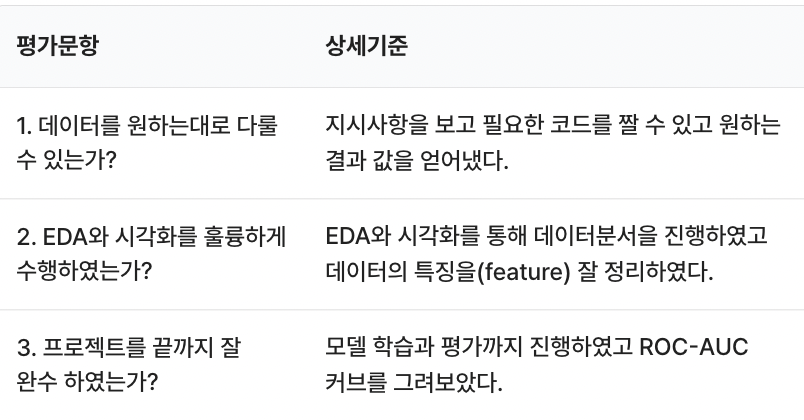

https://www.kaggle.com/competitions/titanic/overview/evaluation

# Titanic
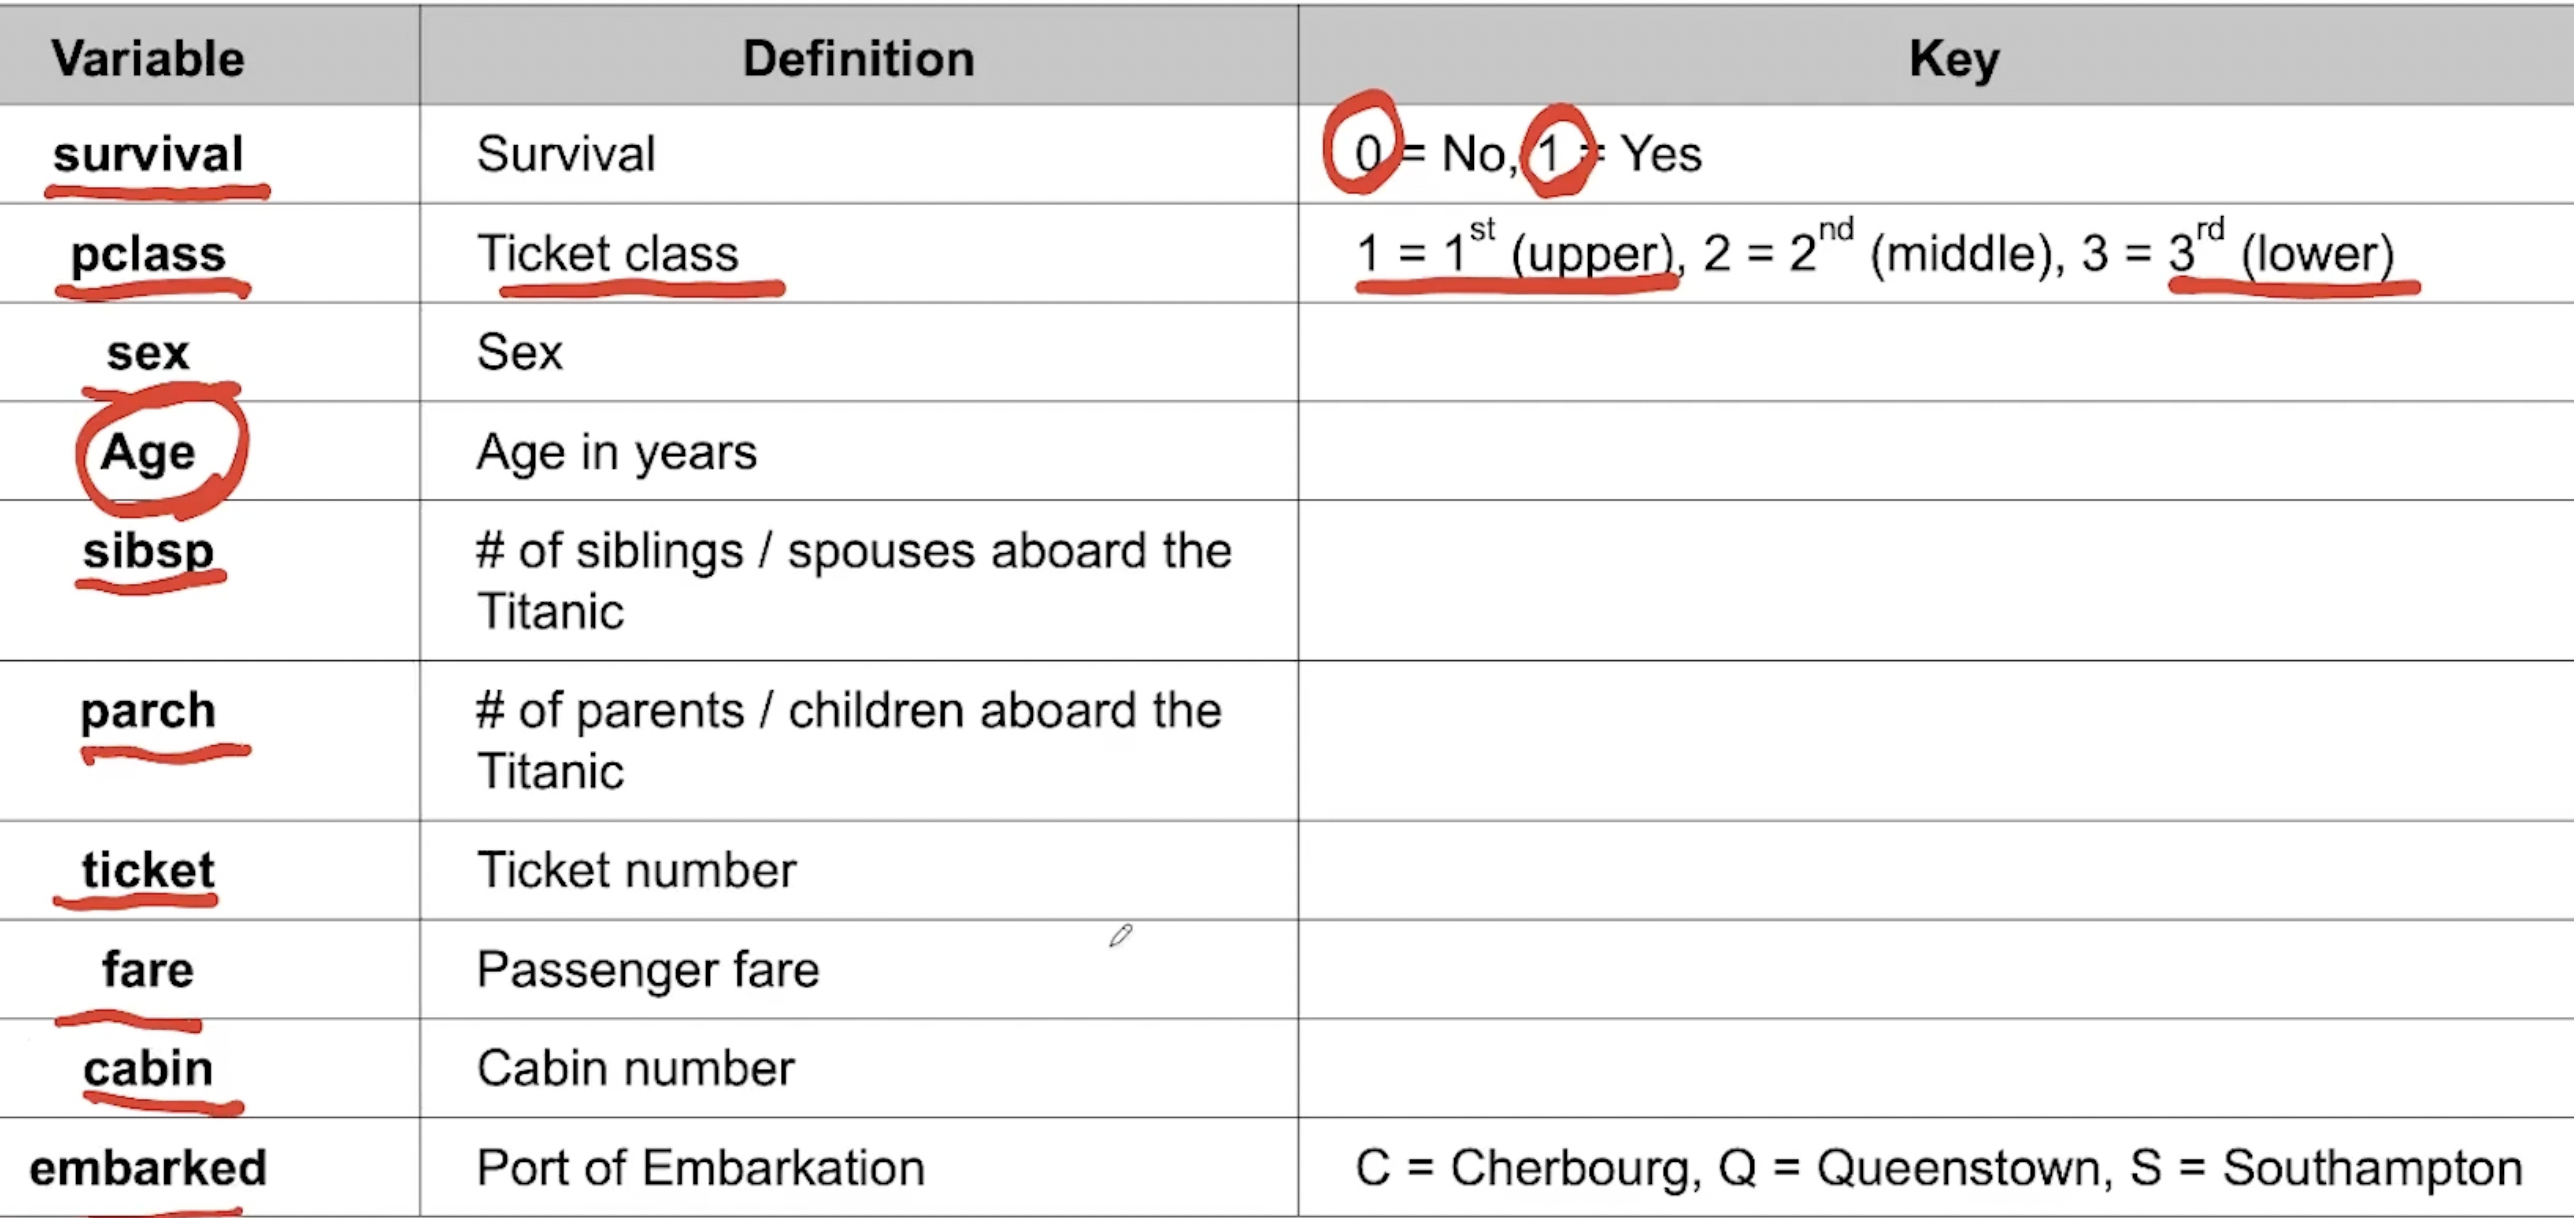

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style= "whitegrid")

%matplotlib inline

In [2]:
import os

path = os.getenv("HOME")
titanic_tr = pd.read_csv(path + "/data/train.csv")
titanic_te = pd.read_csv(path + "/data/test.csv")

### 데이터 확인

In [3]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


train -> 총 891행, 12열  
Age 714 ... float  
Cabin 204  
Embarked 889

In [4]:
titanic_tr.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#test test test test
titanic_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


test -> 총 418행, 11열  
Age 332 ... float  
Cabin 91  
Fare 417  
survived 열이 없다.

In [6]:
titanic_te.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [7]:
titanic_tr.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

id, ticket, name은 고유한 것 같아서 필요 없다?!

In [8]:
titanic_tr['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [9]:
titanic_tr['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [10]:
titanic_tr['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [11]:
titanic_tr['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [12]:
titanic_tr['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

id name ticket cabin 공통된 부분이 없거나 적다.

<AxesSubplot:>

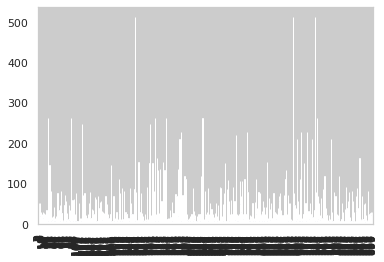

In [13]:
titanic_tr['Fare'].plot(kind= "bar")

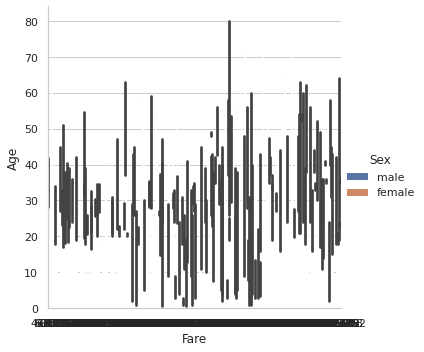

In [14]:
sns.catplot(x= 'Fare', 
            y= 'Age', 
            kind= "bar",
            hue= "Sex",
           data= titanic_tr)

범주형을 시각화하는 categorical plot 인가봐유

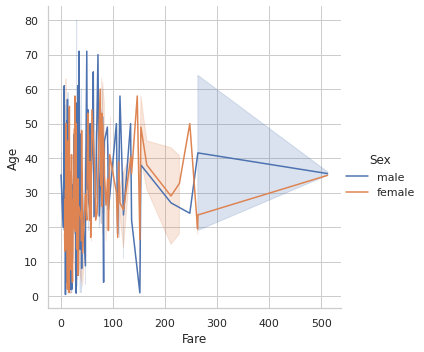

In [15]:
sns.relplot(x= 'Fare', 
            y= 'Age', 
            kind= "line",
            hue= "Sex",
            data= titanic_tr)

relationship plot numerical plot 인가봐유  

<AxesSubplot:xlabel='Pclass'>

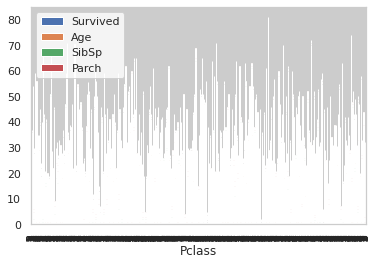

In [91]:
titanic_tr.plot(x= "Pclass", kind='bar', stacked=True)

https://ashhyun.github.io/kaggle/Titanic_1/

https://blog.naver.com/youji4ever/221623491491  
결측치 시각화

In [16]:
ti_tr_null = titanic_tr.isnull().value_counts()
type(ti_tr_null)

pandas.core.series.Series

In [17]:
ti_tr_null.to_frame()

0
PassengerId Survived Pclass Name  Sex   Age   SibSp Parch Ticket Fare  Cabin Embarked     
False       False    False  False False False False False False  False True  False     529
                                                                       False False     183
                                        True  False False False  False True  False     158
                                                                       False False      19
                                        False False False False  False False True        2

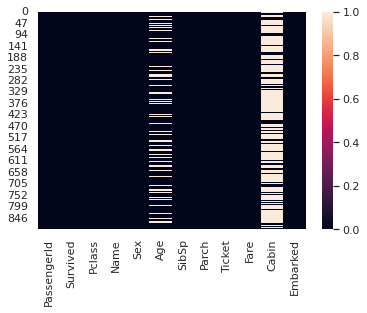

In [18]:
sns.heatmap(titanic_tr.isnull(), cbar= True);

1.0에 가까울수록, 즉, 밝을 수록 결측치가 많네요

In [19]:
titanic_tr["Age"].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [20]:
titanic_tr["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [21]:
titanic_tr["Embarked"].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [22]:
titanic_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치를 깔끔하게 확인하고 싶을때 isnull().sum() 쓰나봐유

In [23]:
ti_tr_ac = titanic_tr.groupby(["Age", "Cabin"])
ti_tr_ac

SeriesGroupBy & DataFrameGroupBy 이러한 type에서는 isnull() 사용이 안되나봐유.

### 결측치 채우기

In [24]:
titanic_tr["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [25]:
titanic_tr["Age"] = titanic_tr["Age"].fillna(0)

In [26]:
titanic_tr['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
titanic_tr['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
titanic_tr["Embarked"] = titanic_tr["Embarked"].fillna("S")

### 열 제거

Cabin에는 결측치가 너무 많고 무엇으로 채울까 안떠올라서 일단 없앨래요.  
Fare는 나중에 데이터 성능 점수랑 연관있다고 하던디..

In [29]:
titanic_tr.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], 
                axis= 1, inplace = True)

drop했다면 copy()써서 새로운 변수에 넣는 것이 만약을 위해서 좋은가봐유

In [30]:
titanic_tr2 = titanic_tr.copy()
titanic_tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [31]:
titanic_tr2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [32]:
titanic_tr2.tail()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
886         0       2    male  27.0      0      0        S
887         1       1  female  19.0      0      0        S
888         0       3  female   0.0      1      2        S
889         1       1    male  26.0      0      0        C
890         0       3    male  32.0      0      0        Q

In [33]:
titanic_tr2["Sex"] = titanic_tr2["Sex"].map({"male": 1, "female": 0})

In [34]:
titanic_tr2["Embarked"] = titanic_tr2["Embarked"].map({"S": 2, "C": 0, "Q": 1})

In [35]:
titanic_tr2[["Embarked", "Sex"]].tail()

Embarked  Sex
886         2    1
887         2    0
888         2    0
889         0    1
890         1    1

### 통계량 탐색

In [36]:
titanic_tr2.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   23.799293    0.523008    0.381594   
std      0.486592    0.836071    0.477990   17.596074    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    6.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   24.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

         Embarked  
count  891.000000  
mean     1.536476  
std      0.791503  
min      0.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      2.000000

### 예측 target인 Survived와의 연관성

In [37]:
titanic_tr2.shape

(891, 7)

print's method 안에서는 . 찍고 new-line에 코드 입력이 가능하네요!

In [38]:
for i in range(1, 6 +1):
    print(titanic_tr2[[titanic_tr2.columns[i], "Survived"]].groupby([titanic_tr2.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print("상준님")

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
상준님
   Sex  Survived
0    0  0.742038
1    1  0.188908
상준님
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
상준님
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
상준님
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
상준님
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009
상준님


as_index= False 있고 없고가 크네유..  
해당 열이 이름이 index에 적히고 안적히고 가독성의 영향을  
오..

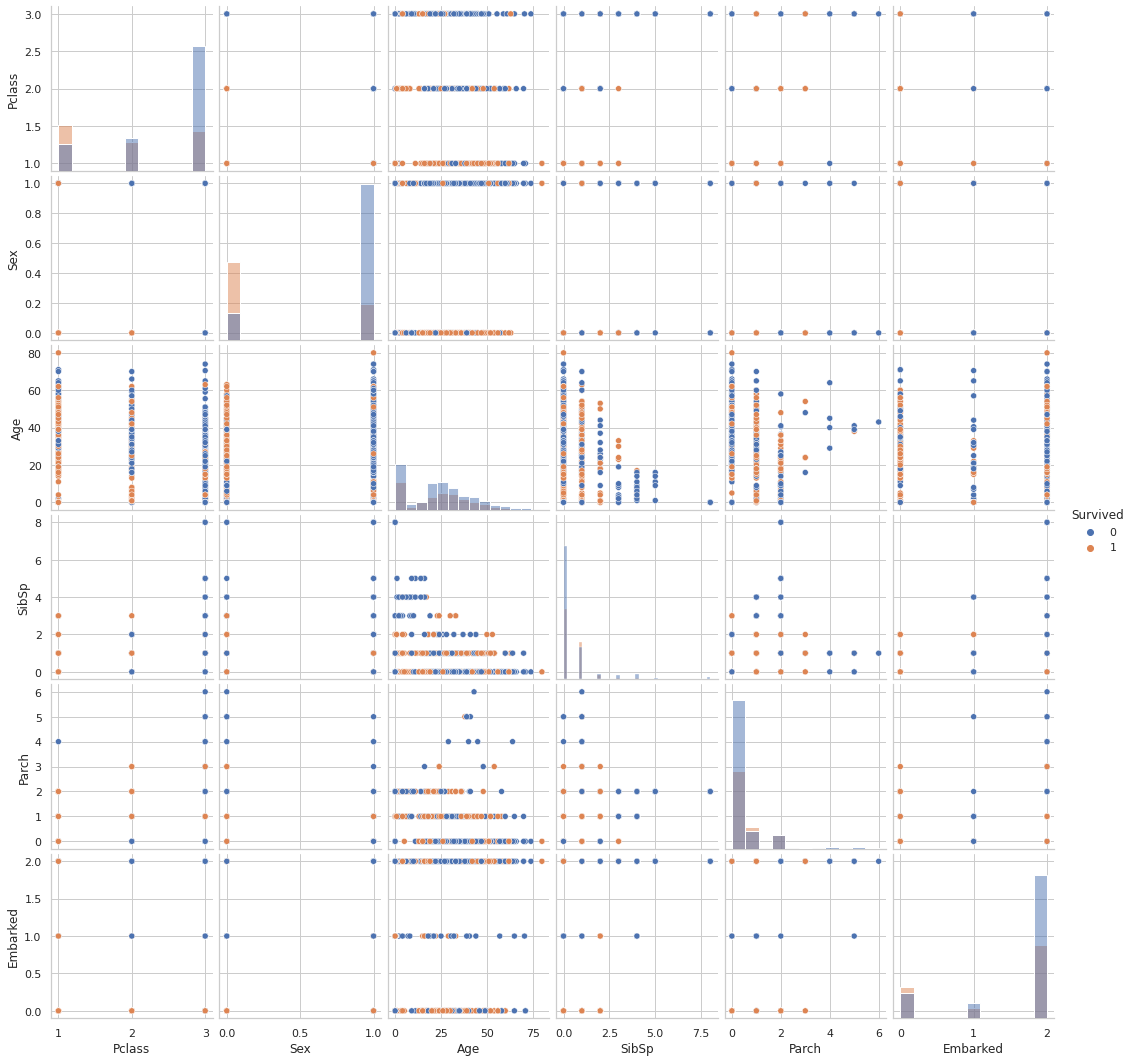

In [39]:
sns.pairplot(titanic_tr2, 
             hue= "Survived",
            diag_kind= "hist");

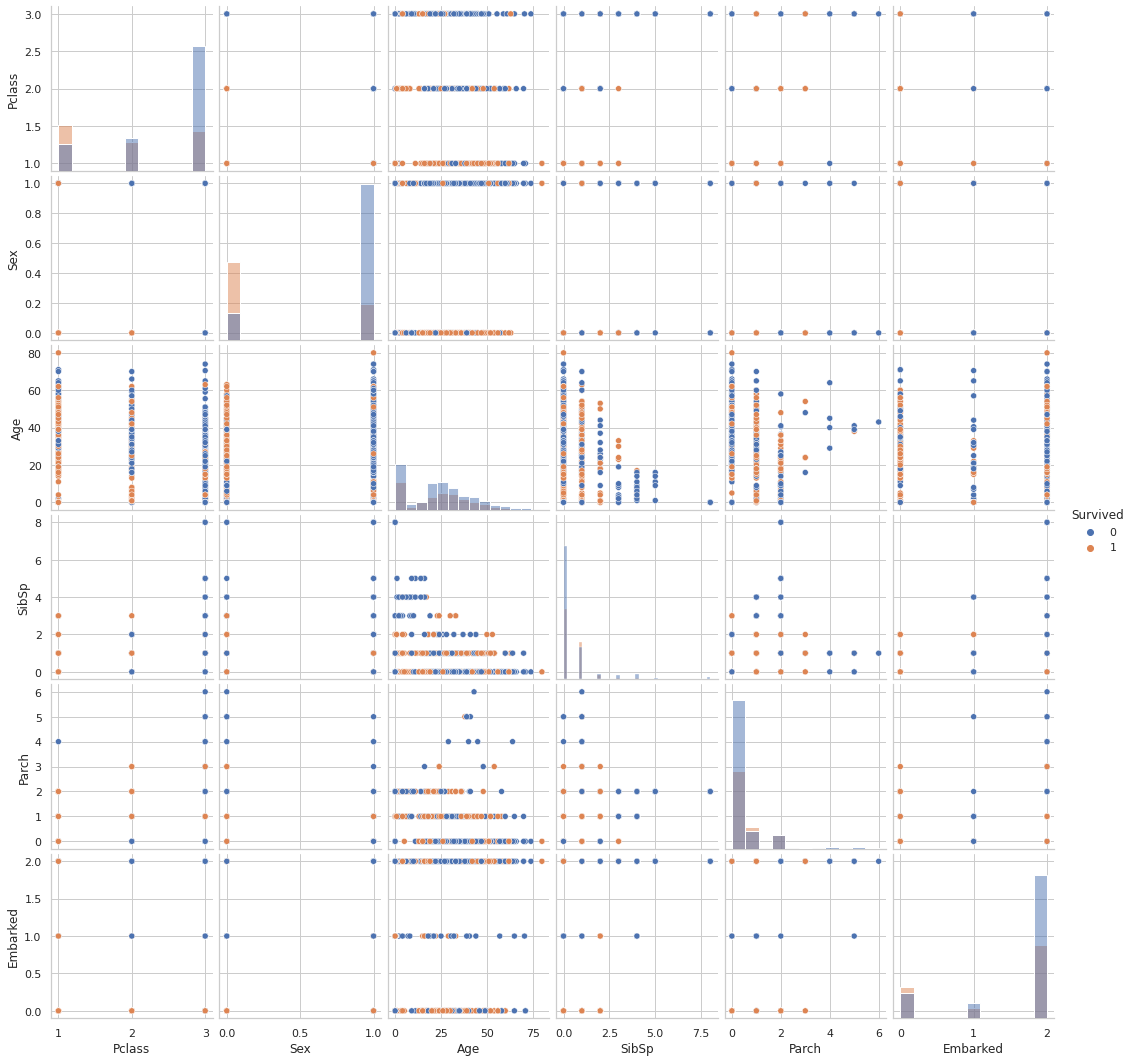

In [40]:
sns.pairplot(titanic_tr2,
             x_vars= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"],
             hue= "Survived",
            diag_kind= "hist");

seaborn.histplot
multiple='layer',  
element='bars'  
https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot  
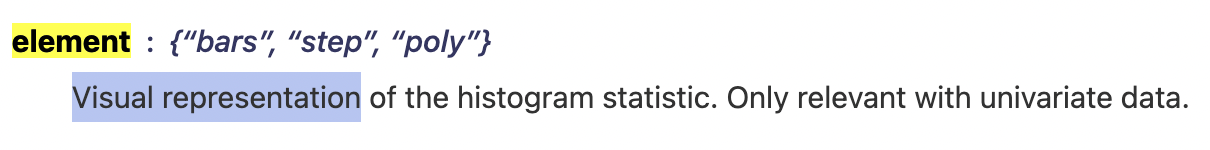

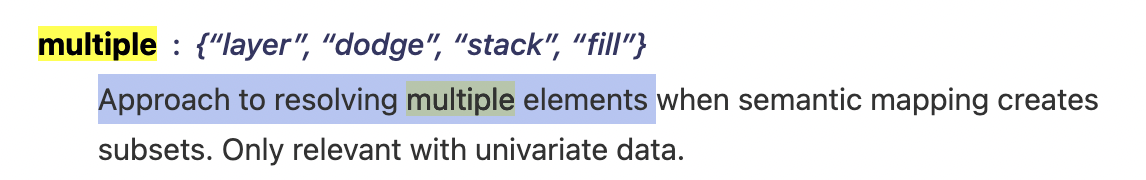

axs의 shape: (2, 3)


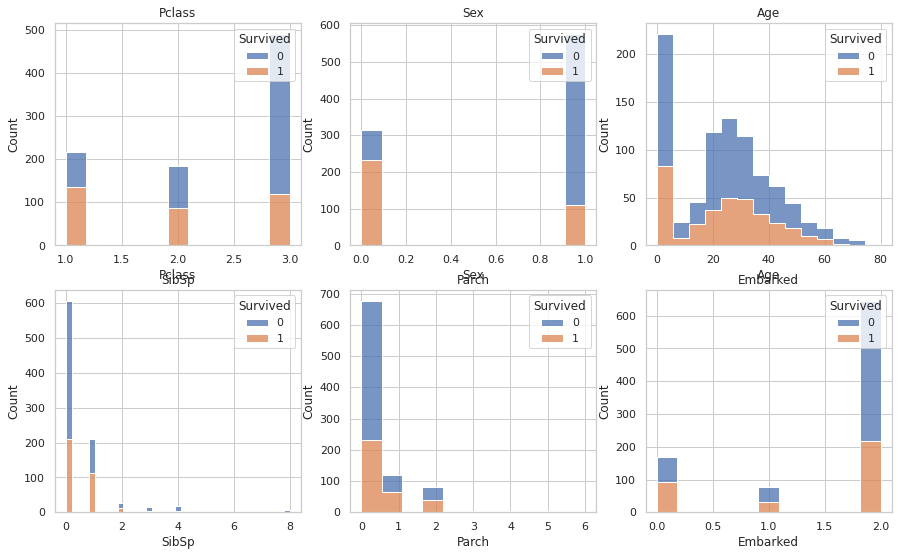

In [41]:
col_name = titanic_tr2.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9))
print("axs의 shape: {}".format(axs.shape))
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data= titanic_tr2,
                 x= titanic_tr2[col_name[i]],
                 hue= 'Survived',
                 multiple= "stack",
                 ax= axs[i], 
                 element= "step")
    axs[i].set_title(col_name[i])

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html#numpy-ndarray-ravel  
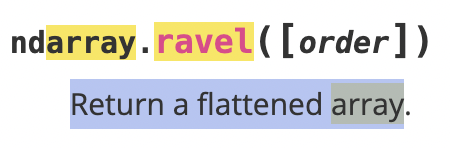
Numpy 다차원 배열을 1차원으로 바꾸나 봐유  
(2, 3) -> (6,)

In [42]:
type(axs)

numpy.ndarray

In [43]:
axs.shape

(6,)

In [44]:
axs

array([<AxesSubplot:title={'center':'Pclass'}, xlabel='Pclass', ylabel='Count'>,
       <AxesSubplot:title={'center':'Sex'}, xlabel='Sex', ylabel='Count'>,
       <AxesSubplot:title={'center':'Age'}, xlabel='Age', ylabel='Count'>,
       <AxesSubplot:title={'center':'SibSp'}, xlabel='SibSp', ylabel='Count'>,
       <AxesSubplot:title={'center':'Parch'}, xlabel='Parch', ylabel='Count'>,
       <AxesSubplot:title={'center':'Embarked'}, xlabel='Embarked', ylabel='Count'>],
      dtype=object)

In [45]:
ti_tr_ran = titanic_tr2.copy()

In [46]:
ti_tr_ran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


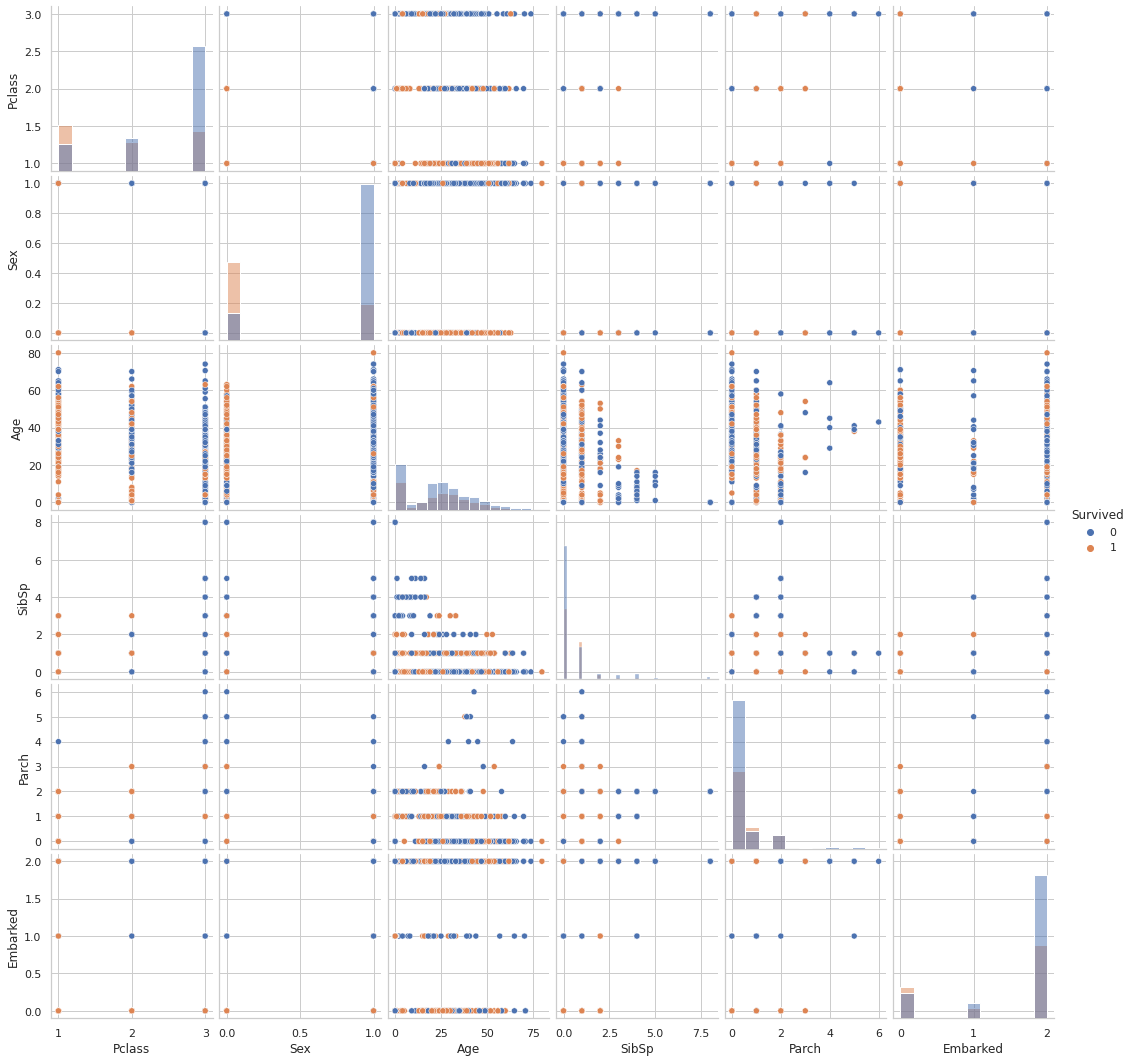

In [47]:
sns.pairplot(ti_tr_ran, 
             hue= "Survived",
            diag_kind= "hist");

In [48]:
plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100, 
                                      size= titanic_tr.iloc[:,1:].shape), #(891, 6)
                    columns= titanic_tr.iloc[:,1:].columns) / 400 #broadcasting
#Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

<Figure size 648x648 with 0 Axes>

In [53]:
ti_tr_ran.iloc[:,1:]= titanic_tr2.iloc[:,1:] + rand #rand라는 df (891, 6)
#(891, 7)

In [52]:
titanic_tr.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [56]:
titanic_tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


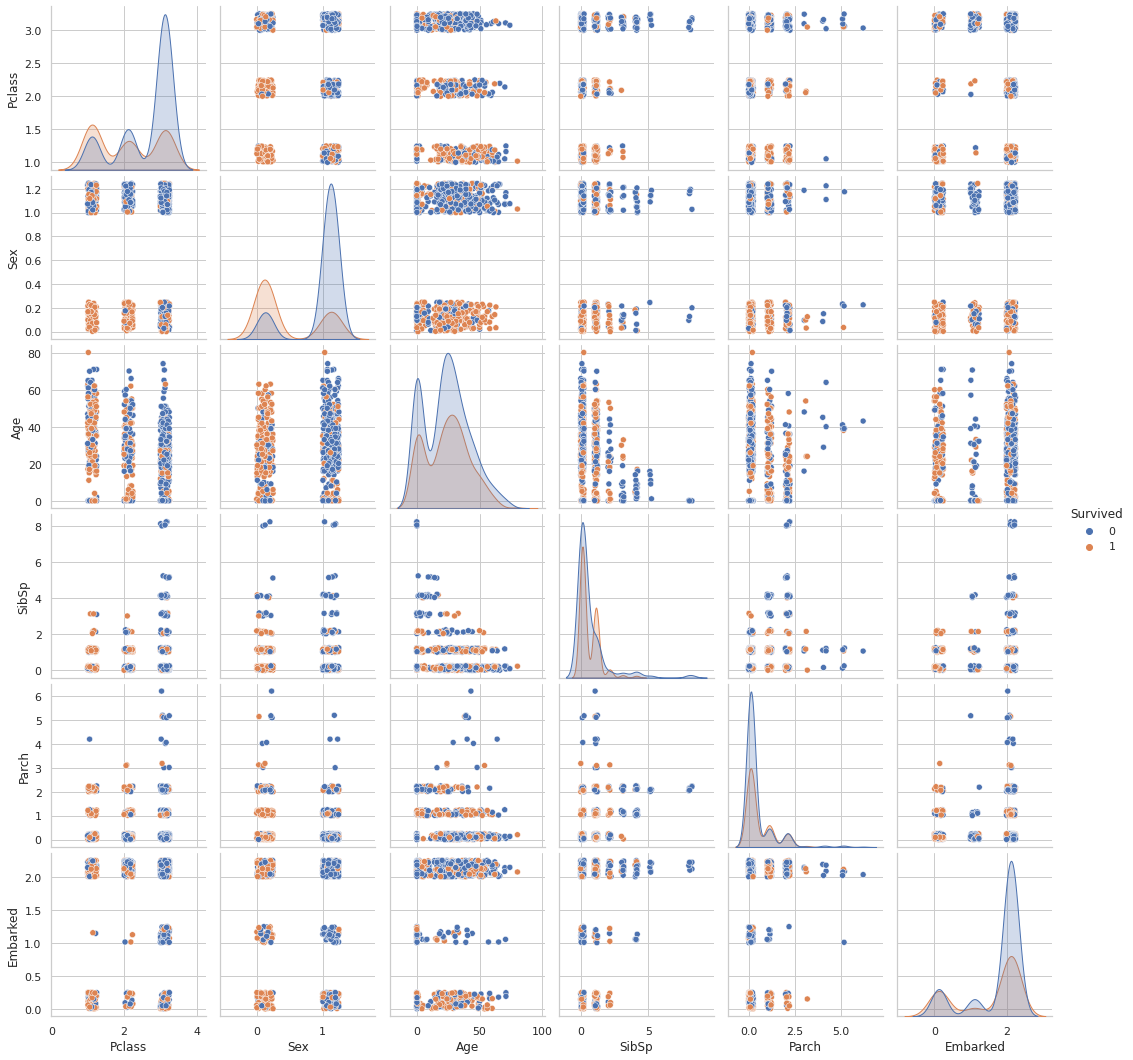

In [54]:
sns.set(style= "whitegrid")
sns.pairplot(ti_tr_ran, hue= 'Survived');  

annot: If True, write the data value in each cell  
False라면 해당 값이 기록지 않는다.

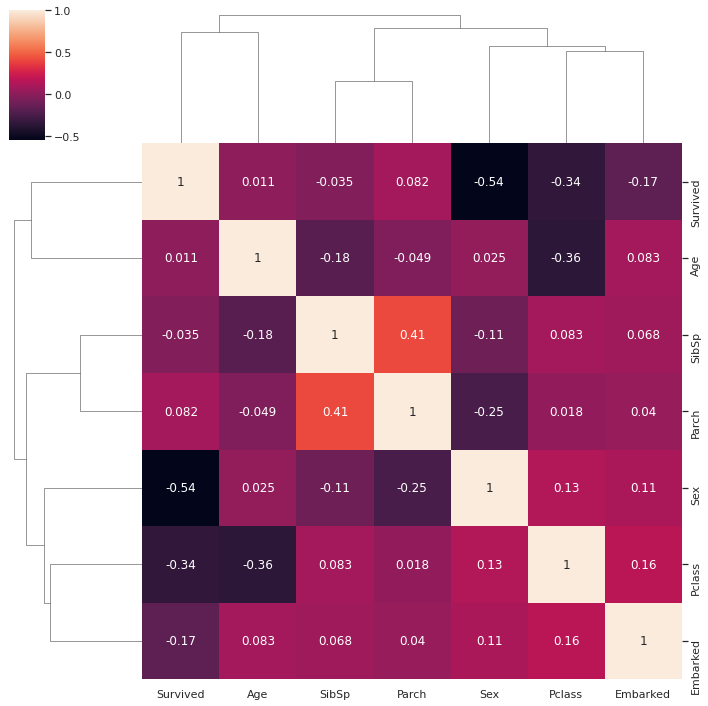

In [57]:
ti_tr2_corr = titanic_tr2.corr()
sns.clustermap(ti_tr2_corr, annot = True);

In [58]:
ti_tr2_corr

Survived    Pclass       Sex       Age     SibSp     Parch  Embarked
Survived  1.000000 -0.338481 -0.543351  0.010539 -0.035322  0.081629 -0.167675
Pclass   -0.338481  1.000000  0.131900 -0.361353  0.083081  0.018443  0.162098
Sex      -0.543351  0.131900  1.000000  0.024978 -0.114631 -0.245489  0.108262
Age       0.010539 -0.361353  0.024978  1.000000 -0.184664 -0.048786  0.083158
SibSp    -0.035322  0.083081 -0.114631 -0.184664  1.000000  0.414838  0.068230
Parch     0.081629  0.018443 -0.245489 -0.048786  0.414838  1.000000  0.039798
Embarked -0.167675  0.162098  0.108262  0.083158  0.068230  0.039798  1.000000

### 모델링

In [59]:
X_train = titanic_tr2.drop(['Survived'], axis=1)
y_train = titanic_tr2['Survived']
X_train.shape, y_train.shape

((891, 6), (891,))

In [60]:
titanic_te.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1, inplace= True)
titanic_te['Age'] = titanic_te['Age'].fillna(0)
titanic_te['Embarked'] = titanic_te['Embarked'].fillna("S")

In [61]:
titanic_te["Sex"] = titanic_te["Sex"].map({"male": 1, "female": 0})
titanic_te["Embarked"] = titanic_te["Embarked"].map({"S": 2, "C": 0, "Q": 1})

In [62]:
titanic_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [63]:
X_test = titanic_te.copy()
X_test.shape

(418, 6)

In [64]:
X_test.tail()

Pclass  Sex   Age  SibSp  Parch  Embarked
413       3    1   0.0      0      0         2
414       1    0  39.0      0      0         0
415       3    1  38.5      0      0         2
416       3    1   0.0      0      0         2
417       3    1   0.0      1      1         0

### Cross validation + Model evaluation
https://scikit-learn.org/stable/modules/classes.html  
https://matplotlib.org/stable/api/ticker_api.html#module-matplotlib.ticker  
matplotlib.ticker  
Tick locating and formatting

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve #roc
from sklearn.metrics import roc_auc_score #auc

ROC = Receiver Operating Characteristic Curve  
민감도(Sensitivity)와 특이도(Specificity)로 그려지는 곡선  

AUC = Area Under the Curve  
AUC가 높다는 사실은 클래스를 구별하는 모델의 성능이 훌륭하다

In [66]:
def kfold(X_train, y_train, clf): #clf (classifier) 
    clf_score = []
    kf = KFold(n_splits = 5, 
               shuffle = True, 
               random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

In [67]:
svc = SVC(gamma='auto')
knc = KNeighborsClassifier(n_neighbors = 3)
sgd1 = SGDClassifier(max_iter=100, tol=1e-3)
sgd2 = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
dt = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators=100)

In [68]:
#error 문구 없애는데 최고인듯..
import warnings
warnings.filterwarnings('ignore')

In [69]:
models = [
    svc, knc, sgd1, sgd2, lr, dt, rf
]


for clf in models:
    print('오..상준님')
    print("model:", clf)
    kfold(X_train, y_train, clf) 


y_predict = clf.predict(X_test)

오..상준님
model: SVC(gamma='auto')
Score: 0.8754203633956852
오..상준님
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8678455489544101
오..상준님
model: SGDClassifier(max_iter=100)
Score: 0.704843831255811
오..상준님
model: SGDClassifier()
Score: 0.7160667853822272
오..상준님
model: LogisticRegression()
Score: 0.7946152512725153
오..상준님
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9205946546480295
오..상준님
model: RandomForestClassifier()
Score: 0.9424815229210332


### ROC-AUC 확인
threshold -> 한계점  
FPR (False Positive Rate) = # False Positives / # negatives = FP / (FP+TN)  
TPR (True Positive Rate) = # True positives / # positives = Recall = TP / (TP+FN)  
https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba

AUC: 0.9971217105263158


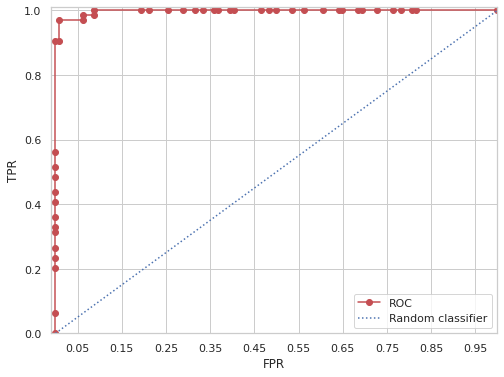

In [94]:
clf2 = rf
clf2.fit(X_tra,y_tra)
pred_proba_class2 = clf2.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class2)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], ':', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred, pred_proba_class2))

AUC: 0.9191337719298246


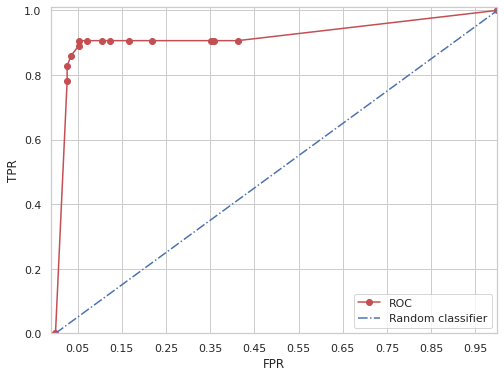

In [95]:
clf3 = dt
clf3.fit(X_tra,y_tra)
pred_proba_class3 = clf3.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class3)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], '-.', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred, pred_proba_class3))

AUC: 0.9981496710526315


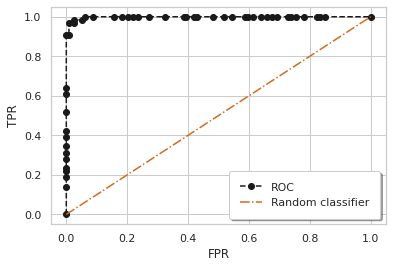

In [93]:
clf4 = rf
clf4.fit(X_tra, y_tra)
pred_proba_class4 = clf4.predict_proba(X_val)[:,1]

fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class4)

plt.plot(fprs, tprs, 'ko--',label='ROC')
plt.plot([0,1],[0,1], color= 'chocolate', linestyle= "dashdot", label='Random classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(fancybox= True, framealpha= 1, shadow= True, borderpad= 1);

print("AUC:", roc_auc_score(y_pred, pred_proba_class4))

roc_curve(y_pred, pred_proba_class4)  
roc_auc_score(y_pred, pred_proba_class4)

In [71]:
fprs

array([0.        , 0.01709402, 0.01709402, 0.03418803, 0.05128205,
       0.05128205, 0.06837607, 0.1025641 , 0.11965812, 0.16239316,
       0.21367521, 0.34188034, 0.35042735, 0.4017094 , 1.        ])

In [72]:
tprs

array([0.        , 0.83606557, 0.8852459 , 0.90163934, 0.93442623,
       0.95081967, 0.95081967, 0.95081967, 0.95081967, 0.95081967,
       0.95081967, 0.95081967, 0.95081967, 0.95081967, 1.        ])

In [73]:
thresholds

array([2.        , 1.        , 0.6       , 0.55555556, 0.44444444,
       0.42857143, 0.2       , 0.18181818, 0.16666667, 0.15789474,
       0.11111111, 0.09230769, 0.07692308, 0.02777778, 0.        ])

In [80]:
y_pred.shape

(178,)

In [92]:
y_val

0      0
4      0
13     0
17     1
26     0
      ..
877    0
879    1
883    0
885    0
886    0
Name: Survived, Length: 178, dtype: int64

In [84]:
pred_proba_class4

array([0.        , 0.        , 0.        , 0.09230769, 0.        ,
       0.        , 0.44444444, 0.        , 0.09230769, 0.02777778,
       1.        , 0.6       , 1.        , 0.44444444, 0.2       ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.02777778, 0.        , 0.        , 0.09230769, 0.09230769,
       0.        , 0.55555556, 1.        , 0.        , 0.        ,
       0.        , 0.02777778, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.09230769,
       0.        , 1.        , 0.09230769, 0.        , 0.        ,
       0.02777778, 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.16666667, 0.        , 0.        , 0.        , 1.        ,
       0.09230769, 0.        , 1.        , 1.        , 1.        ,
       0.09230769, 0.        , 0.        , 0.        , 1.        ,
       0.8125    , 0.        , 1.        , 1.        , 1.     

In [85]:
X_tra

Pclass  Sex   Age  SibSp  Parch  Embarked
1         1    0  38.0      1      0         0
2         3    0  26.0      0      0         2
3         1    0  35.0      1      0         2
5         3    1   0.0      0      0         1
6         1    1  54.0      0      0         2
..      ...  ...   ...    ...    ...       ...
884       3    1  25.0      0      0         2
887       1    0  19.0      0      0         2
888       3    0   0.0      1      2         2
889       1    1  26.0      0      0         0
890       3    1  32.0      0      0         1

[713 rows x 6 columns]

In [86]:
y_tra

1      1
2      1
3      1
5      0
6      0
      ..
884    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 713, dtype: int64

# 회고

이번 프로젝트는 
1. 데이터 까보기 
2. 분석 및 쪼개기
3. 그리기고 구경하기
4. 관련된 규칙 찾기
5. 점수 확인 및 그림 그리기
6. backpropagation를 수동으로 하기
7. '오...'
이런 순서로 전체적인 흐름을 코드 하나 하나 떼어내어 확인하면서 어떻게 코드를 만들어야하는지에 대한 그 느낌을 알게된 그런 시간이였습니다.  

1.  
def에서 막막했는데 KFold, roc, auc 와 같은 모듈?api?가 있어서 다행이였어요.  
먼저 앞길을 튼튼하게 쌓아두신 분들의 대한 존경심 및 사라져버린 의욕들이 조금은 회복이 되었습니다. 하지만 제가 나아가야하는 길은 멀고 험하네요.  
2.  
데이터프레임에서 어떤 열을 astype("category")를 통해서 변경하고  
cat.codes를 통해서 수치화 시켜서 인코딩하는 작업을 알게되었구요.   
찾아보니 map 함수 사용하는 방법도 있더라구요. 물론 수동이지만요.  

전체적인 흐름의 감. 그 감을 잃지 않도록 복습 해야겠네요.

P.S "가장 기억에 남는 것"이라고 성돈님이 답변말고 문장만 넣어달래요:)

새해는 꽃길 걷는 날이 더 많이 생기길 바라겠습니다.